In [1]:
# This DEMO is a 3D ray tracing example [x,y,z] with three-layer velocity model and with one shot using pyekfmm
# It is also a DEMO for visualization of 3D velocity models, traveltime cubes, and ray paths using pyekfmm
# 
#  COPYRIGHT: Yangkang Chen, 2023, The University of Texas at Austin
#

In [2]:
import pyekfmm as fmm
import numpy as np
import matplotlib.pyplot as plt

## 3D grid (currently only allow dx=dy=dz)
v1=3;
v2=4;
v3=5;
nz=301;
nx=51;
ny=51;
dx=0.01;
dz=0.01;
dy=0.01;

## Source location [x,y,z]
sx=0;
sy=0.25;
sz=0;

## create or load velocity model [z,x,y]
vel3d=v1*np.ones([nz,nx,ny],dtype='float32');
vel3d[100:200, :, :]=v2
vel3d[200:301, :, :]=v3


In [3]:
## velocity dimension swap [z,x,y] -> [x,y,z]
vxyz=np.swapaxes(np.swapaxes(vel3d,0,1),1,2);


In [4]:
## FMM calculation
t=fmm.eikonal(vxyz.flatten(order='F'),xyz=np.array([sx,sy,sz]),ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz],order=2);
time=t.reshape(nx,ny,nz,order='F');#first axis (vertical) is x, second is y, third is z
tzxy=np.swapaxes(np.swapaxes(time,1,2),0,1);


/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:91: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:96: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:101: UserWarning: The following kwargs were not used by contour: 'barlabel', 'format', 'dpi'
  C = ax.contourf(


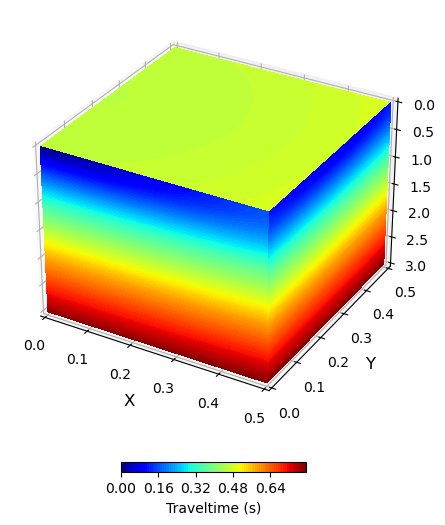

In [5]:
## plot 3D velocity model
from pyekfmm import plot3d

## Below is a quick plot and save the figure
plot3d(tzxy,cmap=plt.cm.jet,barlabel='Traveltime (s)',figname='vel3d.png',format='png',dpi=300)


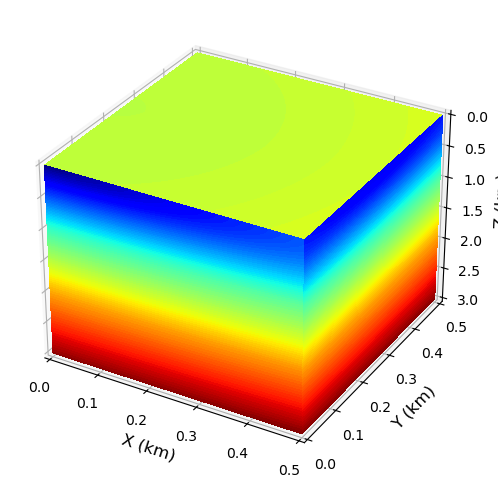

In [6]:
# You can also customize the plotting fuctions
# showf=False means not show the figure immeidate
# close=False means you will continue customizing the figure

plot3d(tzxy,cmap=plt.cm.jet,showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()


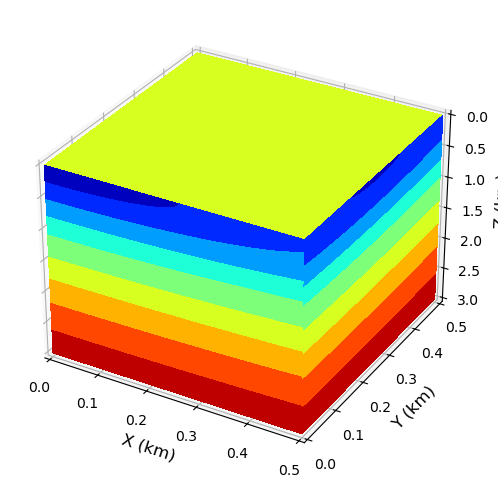

In [7]:
# You can further specify the color levels (default is nlevel=100)

plot3d(tzxy,nlevel=10,cmap=plt.cm.jet,showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()


/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:91: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:96: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyekfmm/pyekfmm/plot.py:101: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


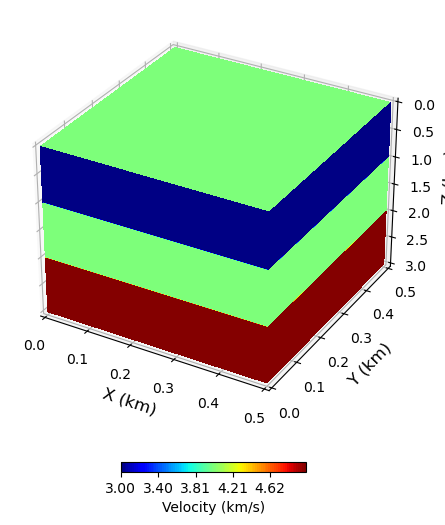

In [8]:
## Also plot the velocity model

# plot3d(vel3d,cmap=plt.cm.jet,barlabel='Velocity (km/s)',figname='vel3d.png',format='png',dpi=300)#,figname='time3d.png',format='png',dpi=300)
plot3d(vel3d,cmap=plt.cm.jet,barlabel='Velocity (km/s)',showf=False,close=False);
plt.gca().set_xlabel("X (km)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Y (km)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Z (km)",fontsize='large', fontweight='normal')
plt.show()


Second break
Before trim (3, 676)
After trim (3, 497)
Second break
Before trim (3, 1139)
After trim (3, 997)
Second break
Before trim (3, 2162)
After trim (3, 1997)
Second break
Before trim (3, 3172)
After trim (3, 2997)


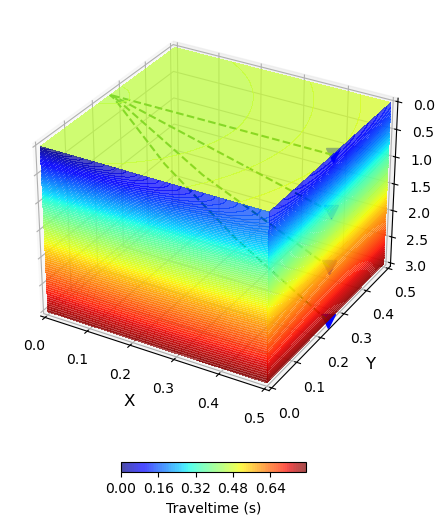

In [9]:
# Ray tracing and plotting
from pyekfmm import ray3d
plot3d(tzxy,cmap=plt.cm.jet,barlabel='Traveltime (s)',showf=False,close=False,alpha=0.7);
rz=np.linspace(0,3,4);
rx=0.5;ry=0.25;
for z in rz:
	paths=ray3d(time,source=[sx,sy,sz],receiver=[rx,ry,z],trim=0.5,ax=[0,dx,nx],ay=[0,dy,ny],az=[0,dz,nz])
	plt.plot(rx,ry,z,'vb',markersize=10);
	## plot rays
	plt.plot(paths[0,:],paths[1,:],paths[2,:],'g--',markersize=20);

plt.savefig('raytracing3d.png',format='png',dpi=300)
# Show Figure
plt.show()
